## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

### 試比較 save_best_only 與否的差異

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for save_best in [True, False]:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=save_best)
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = 'exp-save_best={}'.format(str(save_best))
    results[exp_name_tag] = {'valid-loss': valid_loss,
                             'valid-acc': valid_acc}
    
    # load back
    model = keras.models.load_model('./tmp.h5')
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    exp_name_tag = 'loadback-save_best={}'.format(str(save_best))
    results[exp_name_tag] = {'valid-loss': loss_loadback,
                             'valid-acc': acc_loadback}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 2s 42us/step - loss: 0.5920 - acc: 0.8227 - val_loss: 1.5805 - val_acc: 0.5006
Epoch 46/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.5754 - acc: 0.8282 - val_loss: 1.5874 - val_acc: 0.4987
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5595 - acc: 0.8342 - val_loss: 1.5983 - val_acc: 0.5002
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5425 - acc: 0.8417 - val_loss: 1.6167 - val_acc: 0.5011
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5272 - acc: 0.8474 - val_loss: 1.6351 - val_acc: 0.5004
Epoch 50/50
10000/10000 [==============================] - 1s 73us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________________________

50000/50000 [==============================] - 2s 41us/step - loss: 0.6063 - acc: 0.8181 - val_loss: 1.5807 - val_acc: 0.4873
Epoch 44/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5872 - acc: 0.8264 - val_loss: 1.5848 - val_acc: 0.4867
Epoch 45/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5712 - acc: 0.8314 - val_loss: 1.5941 - val_acc: 0.4879
Epoch 46/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5554 - acc: 0.8372 - val_loss: 1.6313 - val_acc: 0.4910
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5376 - acc: 0.8431 - val_loss: 1.6425 - val_acc: 0.4911
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5231 - acc: 0.8501 - val_loss: 1.6368 - val_acc: 0.4887
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5055 - acc: 0.8572 - val_loss: 1.6569 - val_acc: 0.4833
Epoch 50/50
10000/10000 [=====================

In [9]:
results

{'exp-save_best=True': {'valid-loss': [2.134997315979004,
   1.8137235836029053,
   1.7183509176254272,
   1.6170191549301147,
   1.575937497329712,
   1.5356301502227783,
   1.5273816320419311,
   1.505173074913025,
   1.4869079301834107,
   1.4756991928100587,
   1.470509000968933,
   1.4658706264495849,
   1.4585936614990234,
   1.4466537189483644,
   1.4526434772491454,
   1.441182897567749,
   1.454336181640625,
   1.4286556522369385,
   1.432015237045288,
   1.4313266025543212,
   1.4274833841323853,
   1.4360233673095704,
   1.4307650510787964,
   1.4252200595855713,
   1.435404660987854,
   1.43860973777771,
   1.4298073865890504,
   1.4431533418655396,
   1.444586270904541,
   1.4495385110855104,
   1.4435047080993653,
   1.4563209215164186,
   1.4697456785202025,
   1.4663744733810424,
   1.4758681167602539,
   1.4741614999771118,
   1.491840452003479,
   1.5055660039901733,
   1.5042584972381592,
   1.5322788856506349,
   1.545812455368042,
   1.5407880752563476,
   1.542529

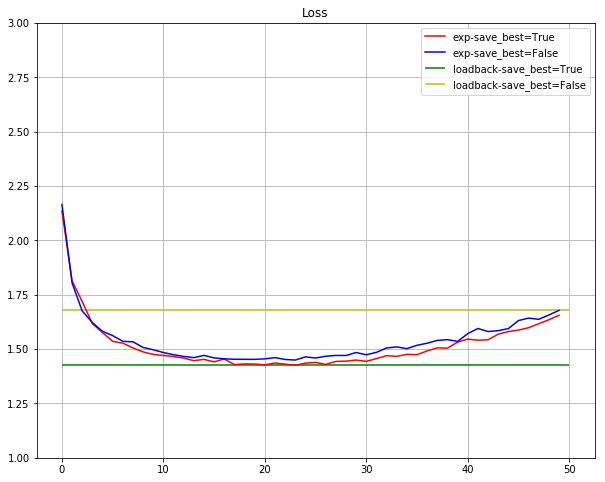

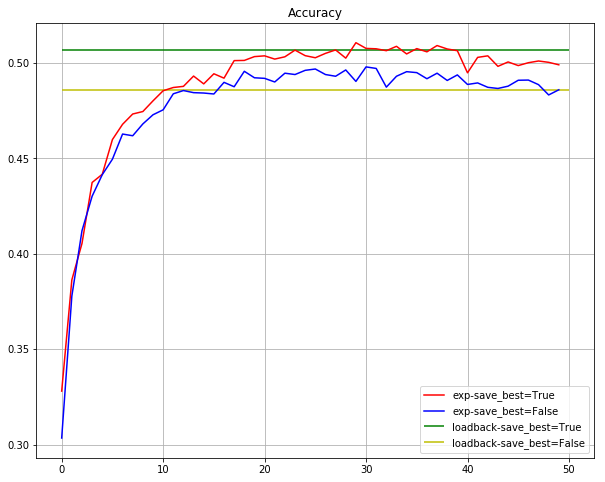

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    if cond[:1] == 'e':
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '-', label=cond, color=color_bar[i])
    elif cond[:1] == 'l':
        plt.hlines(y=results[cond]['valid-loss'], xmax=50, xmin=0, color=color_bar[i], label=cond)
plt.title("Loss")
plt.ylim([1, 3])
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    if cond[:1] == 'e':
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    elif cond[:1] == 'l':
        plt.hlines(y=results[cond]['valid-acc'], xmax=50, xmin=0, color=color_bar[i], label=cond)

plt.title("Accuracy")
plt.legend()
plt.grid()
plt.show()

### 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [14]:
model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True,
                             save_weights_only=True)

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.4911 - acc: 0.8618 - val_loss: 1.6960 - val_acc: 0.4874


In [14]:
# restart and Load back

import keras

model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.load_weights(('./tmp.h5'))

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 107us/step


In [15]:
loss_loadback

1.448662660598755

In [16]:
acc_loadback

0.4911